## **IRIS MIDAS DEPTH ESTIMATION MODEL**

In this colab file you can test the MiDaS Depth Estimation Model we coded.

Originally, our plan was to use this Midas depth estimation model to measure object distances detected by our YOLOv8 system on a Raspberry Pi 4 camera in **realtime**. However, due to the high computational requirements and lack of suitable hardware, we've decided not to implement this at the moment. Instead, we've opted for LIDAR sensors as a more feasible solution. We still decided to share this information because we believe that in the future, integrating the Midas model alongside LIDAR data could significantly enhance accuracy.

Examples:
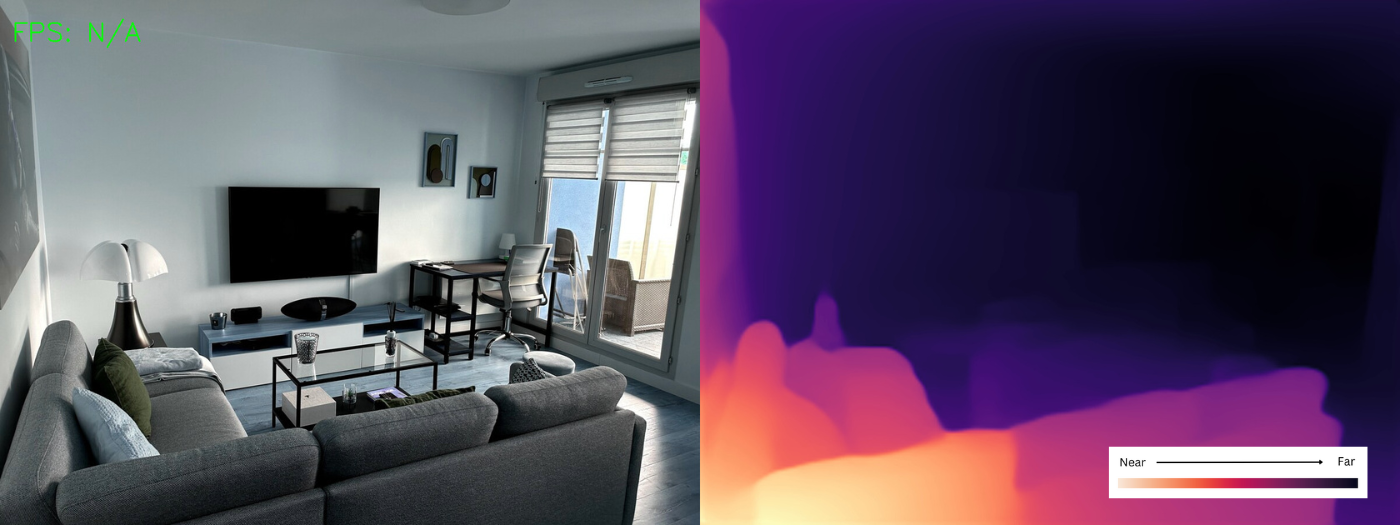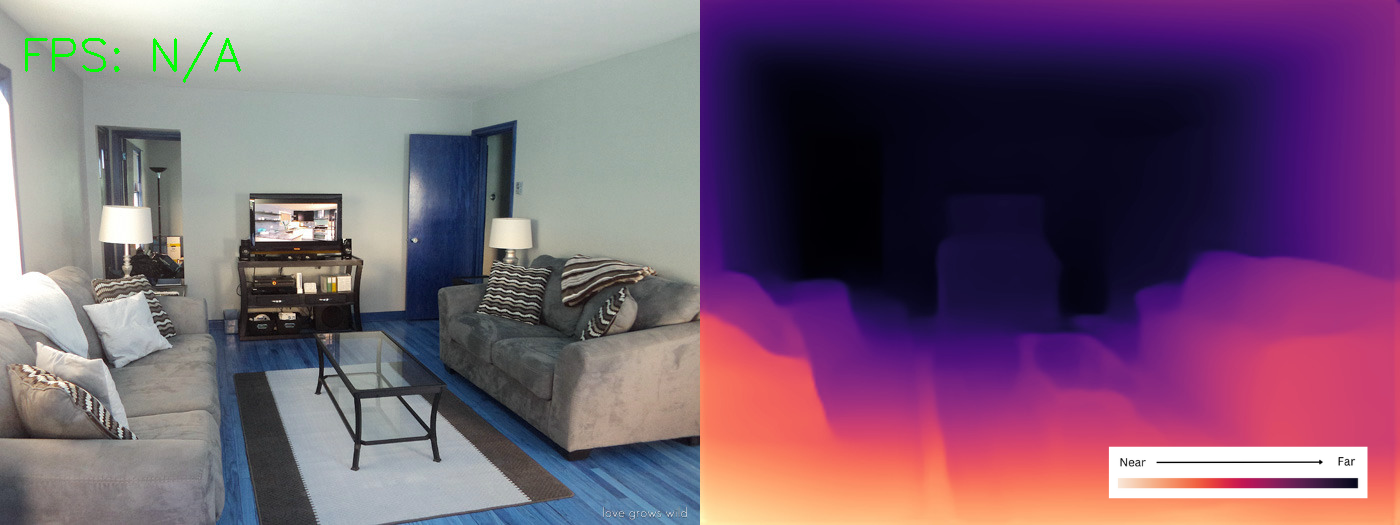

**Important Instructions**

Instructions: [Click here to view instructions](https://1drv.ms/w/s!AicPYeTK2g37hVaOaPUQnxAXDmiU?e=iC85jR)

**(NOTE: Please ensure that you read the instructions above to correctly execute the code; failure to do so may result in encountering errors.)**


# **Install all the required programs**

In [ ]:
!pip3 install torch torchvision torchaudio
!pip install opencv-python
!pip install timm
!pip install opencv-python
!pip install numpy

## **Model Setup**

In [ ]:
import cv2
import torch
import numpy as np
import os

model_type = "MiDaS_small"
midas = torch.hub.load("intel-isl/MiDaS", model_type)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

# **Setup the output directory**

In [ ]:
output_directory = 'output_depth_maps'
os.makedirs(output_directory, exist_ok=True)

# **Add the images you want to test**

In [ ]:
input_images = ["MidasTest-1.jpg", "MidasTest-2.jpg"]

# **Image Processing**

In [ ]:
for image_file in input_images:
    img = cv2.imread(image_file)
    input_batch = transform(img).to(device)
    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()
    depth_map = prediction.cpu().numpy()
    depth_map = cv2.normalize(depth_map, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    depth_map = (depth_map * 255).astype(np.uint8)
    depth_map = cv2.applyColorMap(depth_map, cv2.COLORMAP_MAGMA)
    output_file = os.path.join(output_directory, f"{os.path.splitext(os.path.basename(image_file))[0]}_depth_map.png")
    cv2.imwrite(output_file, depth_map)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.putText(img, 'FPS: N/A', (20, 70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    output_file = os.path.join(output_directory, f"{os.path.basename(image_file)}_processed.png")
    cv2.imwrite(output_file, img)

print("Processing and saving images completed.")

Processing and saving images completed.
